In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd

folder_path = 'imu-dataset-processed/combine/'

dfs = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):  # Check if the file is an Excel file
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)
        
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)


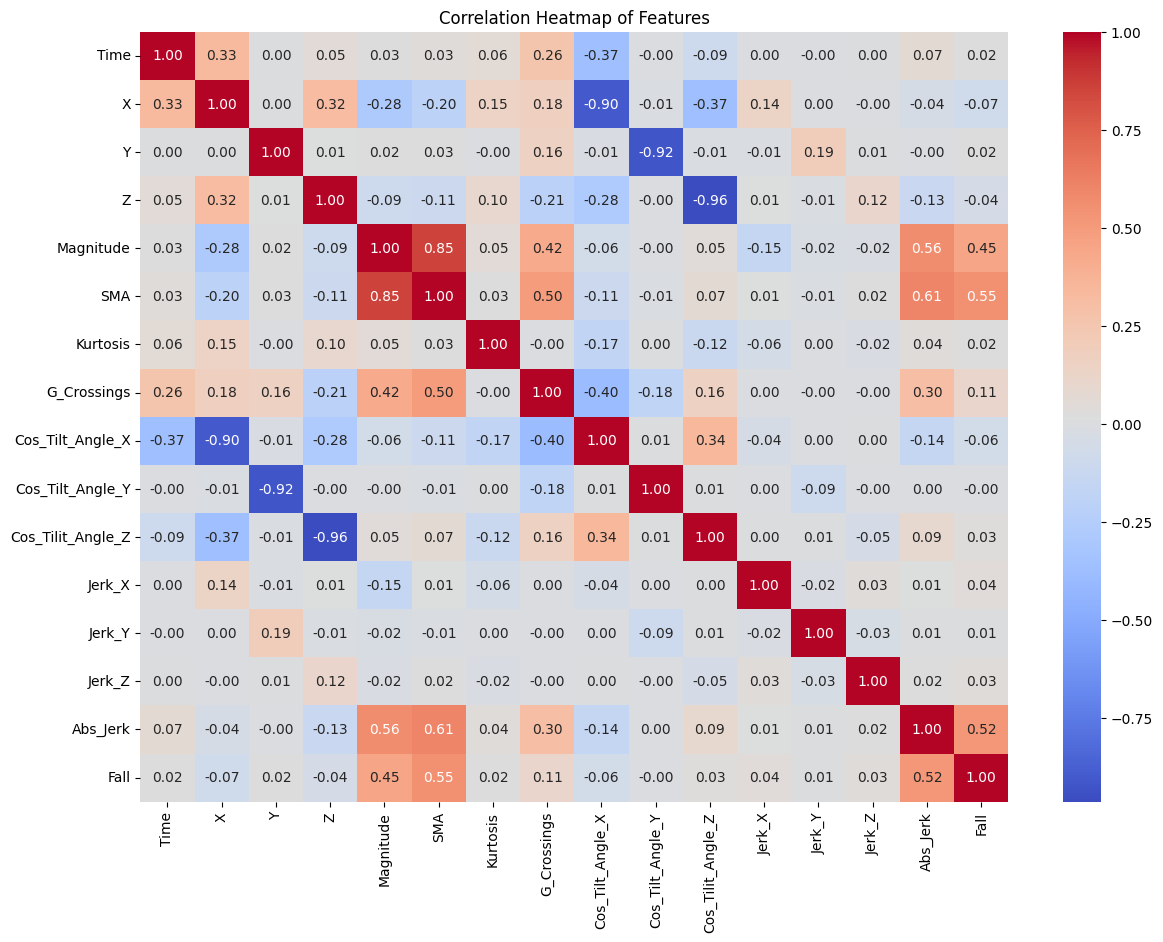

In [3]:
#Heat Map showing correlation

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


C:\Users\prave\AppData\Local\Programs\Python\Python311\Lib\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


[LightGBM] [Info] Number of positive: 31, number of negative: 8771
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3591
[LightGBM] [Info] Number of data points in the train set: 8802, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003522 -> initscore=-5.645219
[LightGBM] [Info] Start training from score -5.645219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

  0%|          | 0/15 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 31, number of negative: 8771
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3336
[LightGBM] [Info] Number of data points in the train set: 8802, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003522 -> initscore=-5.645219
[LightGBM] [Info] Start training from score -5.645219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

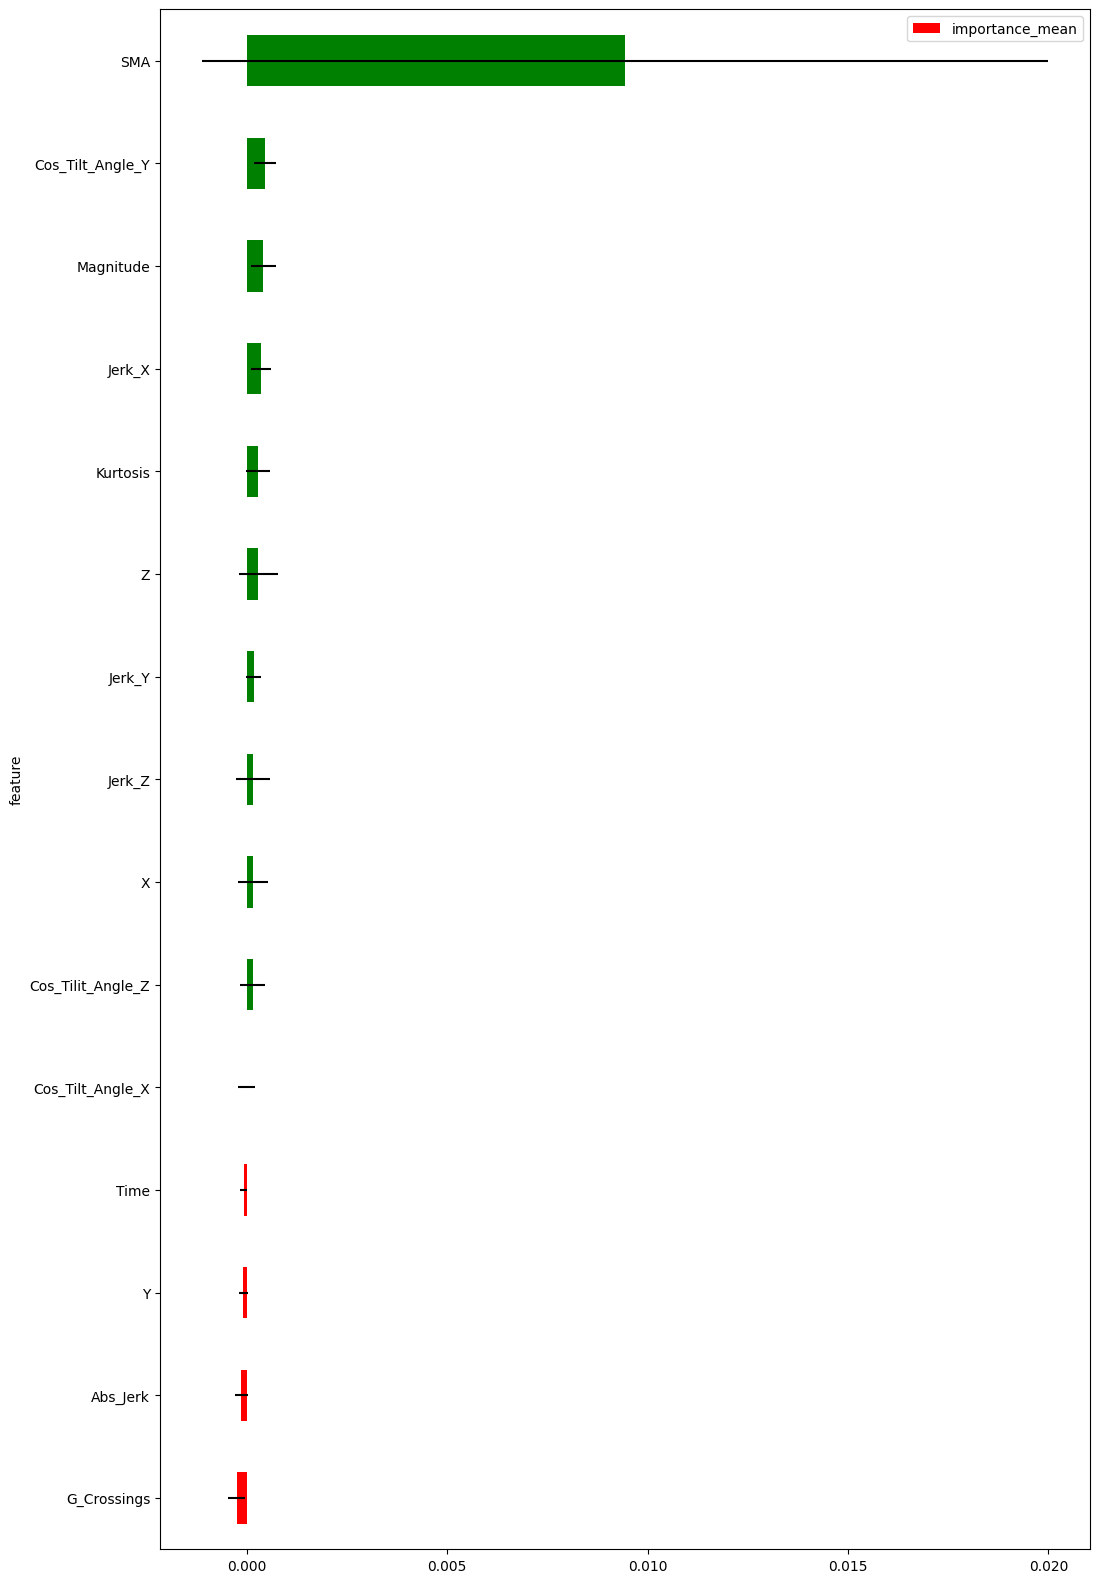

In [4]:

#LOFO technique
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance
%matplotlib inline

sample_df = combined_df.sample(frac=0.01, random_state=0)

# define the validation scheme
cv = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split validation

# define the binary target and the features
dataset = Dataset(df=sample_df, target="Fall", features=[col for col in combined_df.columns if col != "Fall"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))
